In [6]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

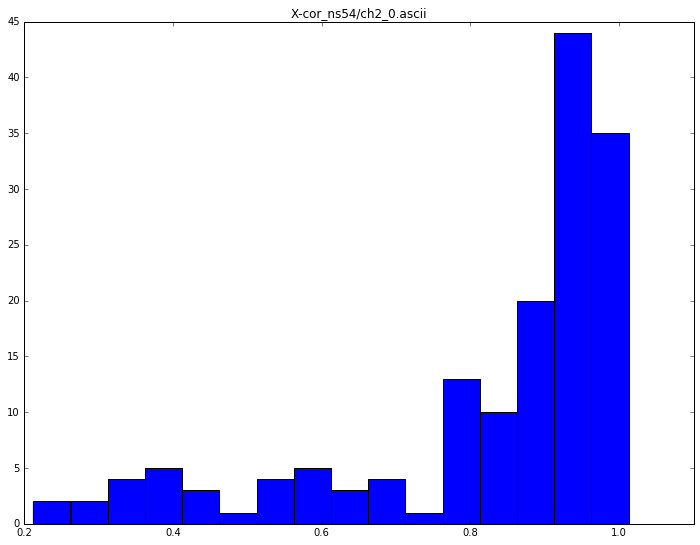

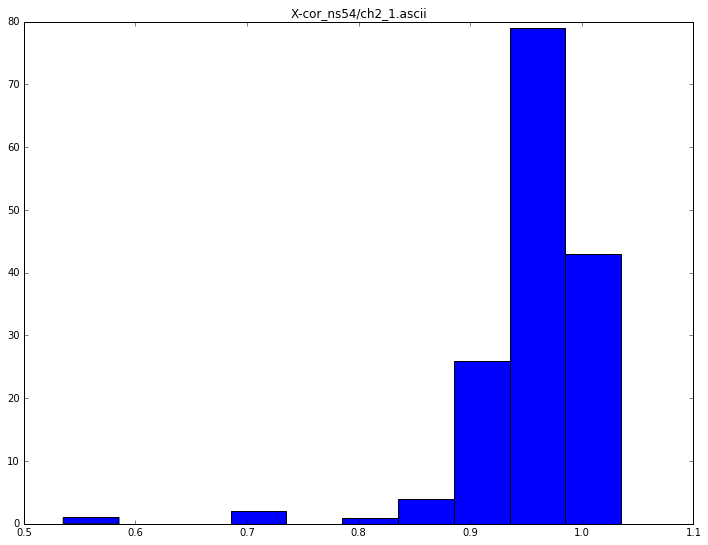

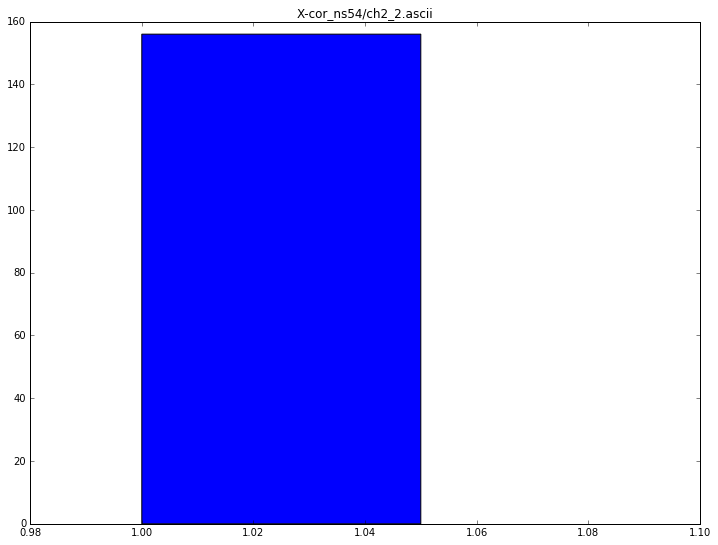

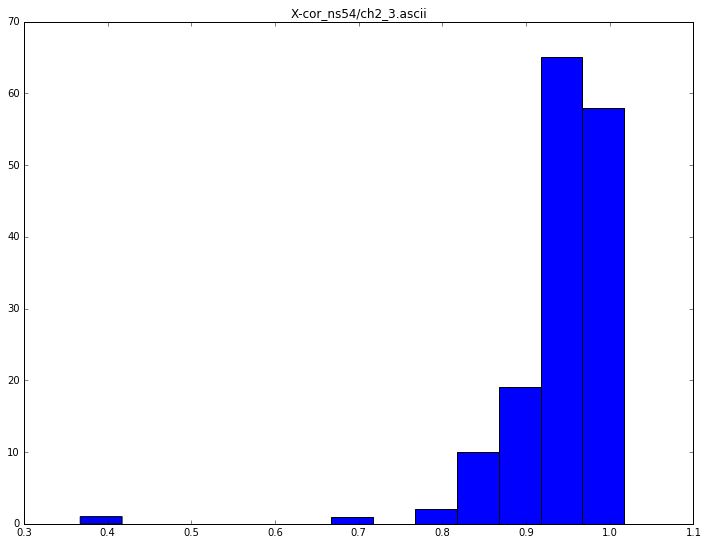

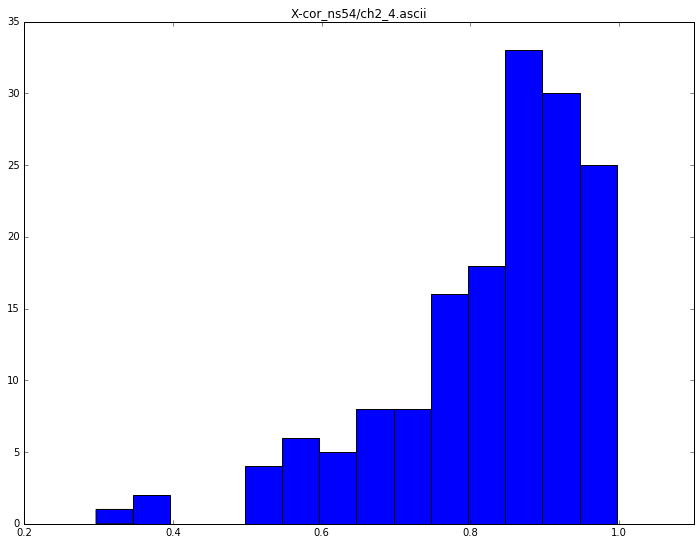

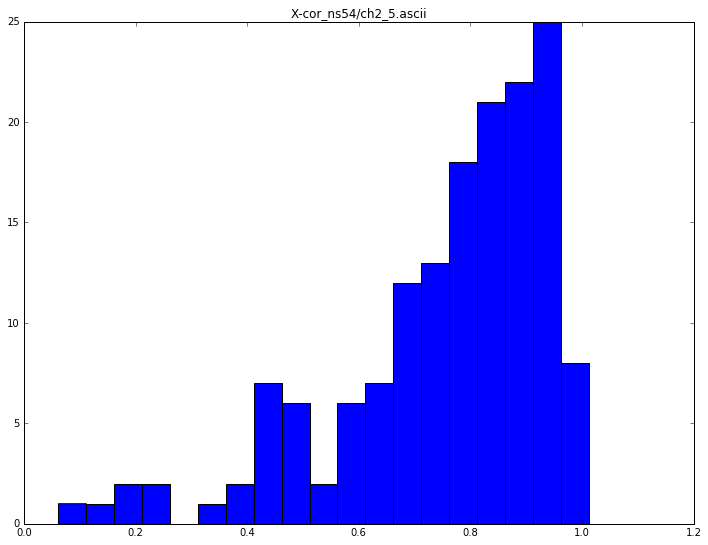

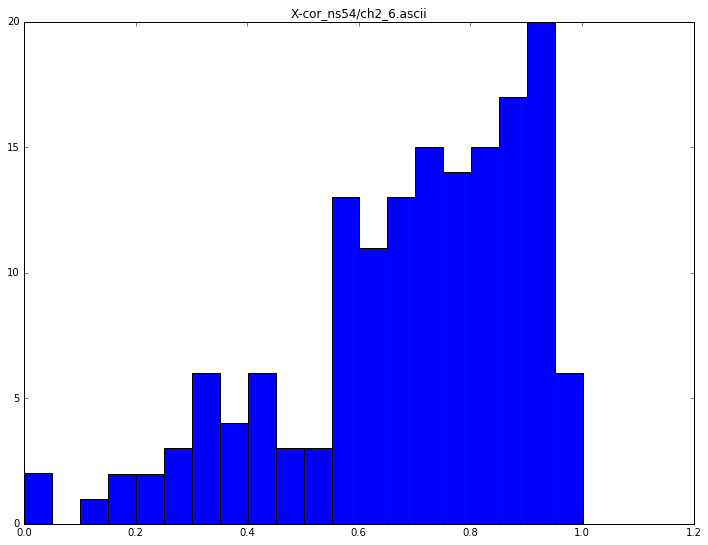

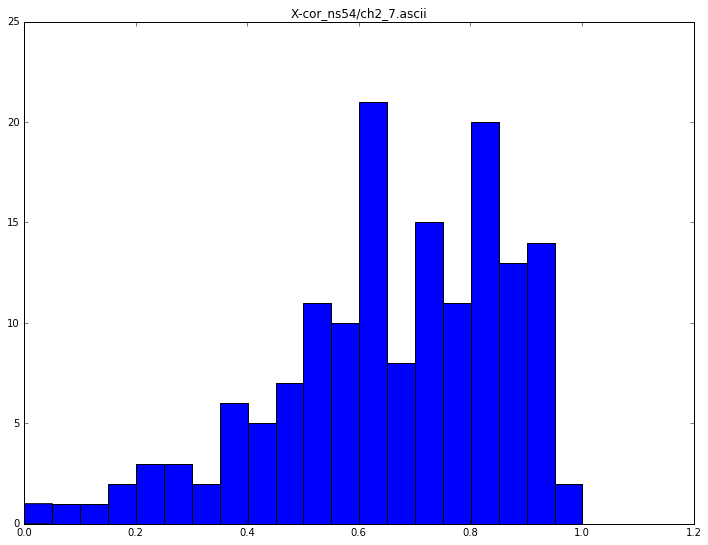

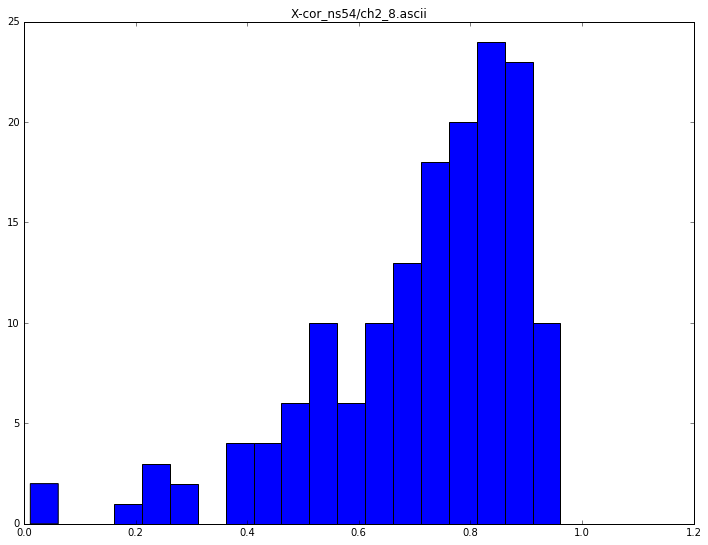

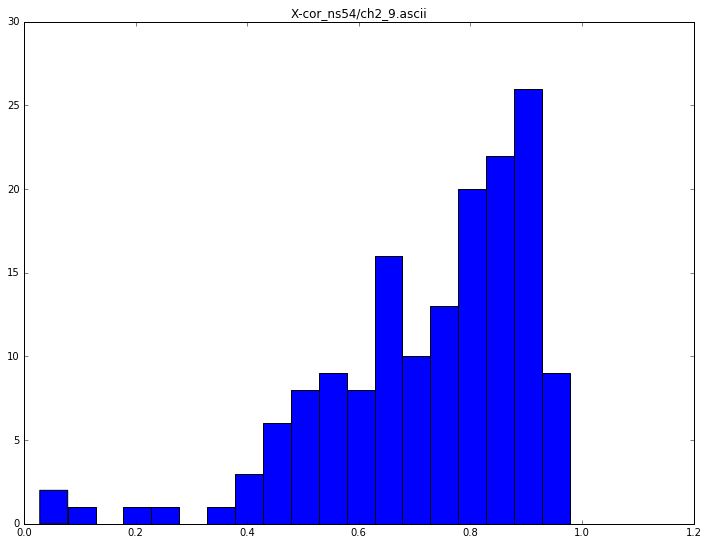

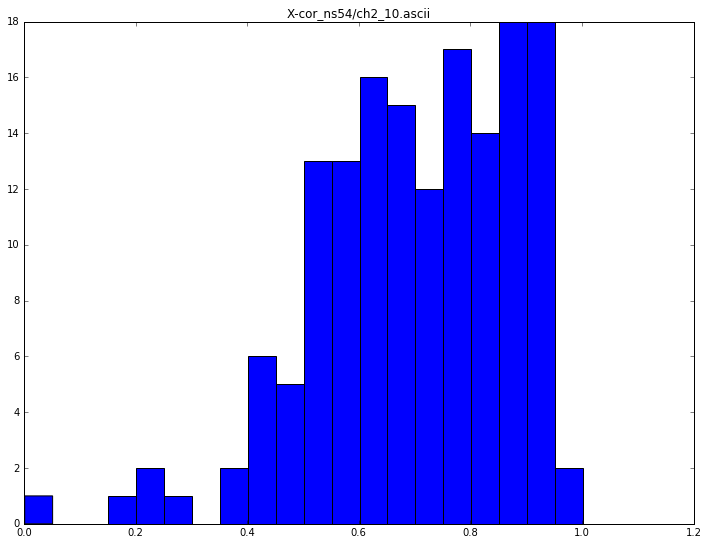

In [7]:
# Generate Plot for background data
for i in range(11):
    fname = 'X-cor_ns54/ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    cor = np.loadtxt(fname)
    plt.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    plt.title(fname)
    plt.show()

In [8]:
#Test 9th Oct 2006

start_date = datetime(2006,10,8,0,0,0);
end_date = datetime(2006,10,9,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  54
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_061008_v1.03.ascii


In [4]:
#Print cross-cor coef between channel 2 and all other channels.
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
print type(output_data)
for i in range(11):
    a0 = np.asarray(output_data[54][signal])[:,2]
    ar2 = np.asarray(output_data[54][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

<type 'dict'>
{0: array([ 0.83148883]), 1: array([ 0.94619019]), 2: array([ 1.]), 3: array([ 0.79996203]), 4: array([ 0.55877969]), 5: array([ 0.49685049]), 6: array([ 0.4309518]), 7: array([ 0.4236888]), 8: array([ 0.57866459]), 9: array([ 0.54628556]), 10: array([ 0.50906531])}


In [5]:
output_data[54]['datetime']

[datetime.datetime(2006, 10, 8, 0, 3, 9, 993600),
 datetime.datetime(2006, 10, 8, 0, 7, 10, 12800),
 datetime.datetime(2006, 10, 8, 0, 11, 10, 32000),
 datetime.datetime(2006, 10, 8, 0, 15, 9, 964800),
 datetime.datetime(2006, 10, 8, 0, 19, 9, 984000),
 datetime.datetime(2006, 10, 8, 0, 23, 10, 3200),
 datetime.datetime(2006, 10, 8, 0, 27, 10, 22400),
 datetime.datetime(2006, 10, 8, 0, 31, 10, 41600),
 datetime.datetime(2006, 10, 8, 0, 35, 9, 974400),
 datetime.datetime(2006, 10, 8, 0, 39, 9, 993600),
 datetime.datetime(2006, 10, 8, 0, 43, 10, 12800),
 datetime.datetime(2006, 10, 8, 0, 47, 10, 32000),
 datetime.datetime(2006, 10, 8, 0, 51, 9, 964800),
 datetime.datetime(2006, 10, 8, 0, 55, 9, 984000),
 datetime.datetime(2006, 10, 8, 0, 59, 10, 3200),
 datetime.datetime(2006, 10, 8, 1, 3, 10, 22400),
 datetime.datetime(2006, 10, 8, 1, 7, 10, 41600),
 datetime.datetime(2006, 10, 8, 1, 11, 9, 974400),
 datetime.datetime(2006, 10, 8, 1, 15, 9, 993600),
 datetime.datetime(2006, 10, 8, 1, 19

In [5]:
#To find porbability of a give X-correlation parameter to land in a given or lower bin.

xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'X-cor_ns54/ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)
#prints file name, cross-cor value and corresponding p-value

X-cor_ns54/ch2_0.ascii [ 0.83148883] 0.37
X-cor_ns54/ch2_1.ascii [ 0.94619019] 0.72
X-cor_ns54/ch2_2.ascii [ 1.] 1.00
X-cor_ns54/ch2_3.ascii [ 0.79996203] 0.03
X-cor_ns54/ch2_4.ascii [ 0.55877969] 0.08
X-cor_ns54/ch2_5.ascii [ 0.49685049] 0.14
X-cor_ns54/ch2_6.ascii [ 0.4309518] 0.17
X-cor_ns54/ch2_7.ascii [ 0.4236888] 0.15
X-cor_ns54/ch2_8.ascii [ 0.57866459] 0.24
X-cor_ns54/ch2_9.ascii [ 0.54628556] 0.21
X-cor_ns54/ch2_10.ascii [ 0.50906531] 0.20


In [6]:
#Test 25th May 2009

start_date = datetime(2009,5,20,0,0,0);
end_date = datetime(2009,5,26,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  54
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_090524_v1.03.ascii


In [7]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[54][signal])[:,2]
    ar2 = np.asarray(output_data[54][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.90564443]), 1: array([ 0.9698943]), 2: array([ 1.]), 3: array([ 0.51876266]), 4: array([ 0.28480329]), 5: array([ 0.22985944]), 6: array([ 0.2348699]), 7: array([ 0.26582402]), 8: array([ 0.2645961]), 9: array([ 0.26655484]), 10: array([ 0.26925032])}


In [8]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'X-cor_ns54/ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

X-cor_ns54/ch2_0.ascii [ 0.90564443] 0.49
X-cor_ns54/ch2_1.ascii [ 0.9698943] 0.72
X-cor_ns54/ch2_3.ascii [ 0.51876266] 0.01
X-cor_ns54/ch2_5.ascii [ 0.22985944] 0.04
X-cor_ns54/ch2_6.ascii [ 0.2348699] 0.04
X-cor_ns54/ch2_7.ascii [ 0.26582402] 0.07
X-cor_ns54/ch2_8.ascii [ 0.2645961] 0.05
X-cor_ns54/ch2_9.ascii [ 0.26655484] 0.03
X-cor_ns54/ch2_10.ascii [ 0.26925032] 0.03


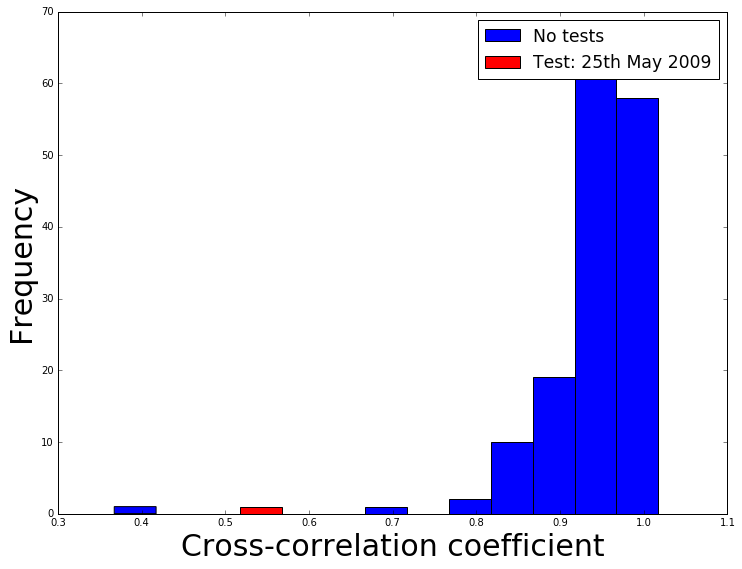

In [9]:
fname = 'X-cor_ns54/ch2_3.ascii'
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
cor = np.loadtxt(fname)
ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
ax.hist(xv[3], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 25th May 2009')
#plt.title(fname)
plt.xlabel('Cross-correlation coefficient', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)
plt.legend(fontsize = 'xx-large')
plt.show()

In [10]:
#Test 12th Feb 2013

start_date = datetime(2013,2,9,0,0,0);
end_date = datetime(2013,2,13,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  54
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_130210_v1.03.ascii


In [11]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[54][signal])[:,2]
    ar2 = np.asarray(output_data[54][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.86554345]), 1: array([ 0.97030944]), 2: array([ 1.]), 3: array([ 0.95936102]), 4: array([ 0.60858687]), 5: array([ 0.44541832]), 6: array([ 0.29237644]), 7: array([ 0.22931216]), 8: array([ 0.26515978]), 9: array([ 0.3520484]), 10: array([ 0.40900525])}


In [12]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'X-cor_ns54/ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

X-cor_ns54/ch2_0.ascii [ 0.86554345] 0.49
X-cor_ns54/ch2_1.ascii [ 0.97030944] 0.72
X-cor_ns54/ch2_2.ascii [ 1.] 1.00
X-cor_ns54/ch2_3.ascii [ 0.95936102] 0.63
X-cor_ns54/ch2_4.ascii [ 0.60858687] 0.12
X-cor_ns54/ch2_5.ascii [ 0.44541832] 0.10
X-cor_ns54/ch2_6.ascii [ 0.29237644] 0.06
X-cor_ns54/ch2_7.ascii [ 0.22931216] 0.05
X-cor_ns54/ch2_8.ascii [ 0.26515978] 0.05
X-cor_ns54/ch2_9.ascii [ 0.3520484] 0.04
X-cor_ns54/ch2_10.ascii [ 0.40900525] 0.08


In [13]:
#Test 6th Jan 2016

start_date = datetime(2016,1,2,0,0,0);
end_date = datetime(2016,1,7,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  54
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_160103_v1.03.ascii


In [14]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[54][signal])[:,2]
    ar2 = np.asarray(output_data[54][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.9921995]), 1: array([ 0.99709324]), 2: array([ 1.]), 3: array([ 0.98807985]), 4: array([ 0.96474178]), 5: array([ 0.95080567]), 6: array([ 0.93242719]), 7: array([ 0.9167545]), 8: array([ 0.9298768]), 9: array([ 0.93921355]), 10: array([ 0.93808342])}


In [15]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'X-cor_ns54/ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

X-cor_ns54/ch2_0.ascii [ 0.9921995] 1.00
X-cor_ns54/ch2_1.ascii [ 0.99709324] 1.00
X-cor_ns54/ch2_2.ascii [ 1.] 1.00
X-cor_ns54/ch2_3.ascii [ 0.98807985] 1.00
X-cor_ns54/ch2_4.ascii [ 0.96474178] 1.00
X-cor_ns54/ch2_5.ascii [ 0.95080567] 0.95
X-cor_ns54/ch2_6.ascii [ 0.93242719] 0.96
X-cor_ns54/ch2_7.ascii [ 0.9167545] 0.99
X-cor_ns54/ch2_8.ascii [ 0.9298768] 1.00
X-cor_ns54/ch2_9.ascii [ 0.93921355] 1.00
X-cor_ns54/ch2_10.ascii [ 0.93808342] 0.99


In [16]:
#Test 9th Sept 2016

start_date = datetime(2016,9,4,0,0,0);
end_date = datetime(2016,9,10,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  54
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_160904_v1.03.ascii


In [17]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[54][signal])[:,2]
    ar2 = np.asarray(output_data[54][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.99509029]), 1: array([ 0.99840777]), 2: array([ 1.]), 3: array([ 0.99635832]), 4: array([ 0.97559366]), 5: array([ 0.95880331]), 6: array([ 0.92702036]), 7: array([ 0.8872584]), 8: array([ 0.89495642]), 9: array([ 0.93346193]), 10: array([ 0.92548569])}


In [18]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'X-cor_ns54/ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

X-cor_ns54/ch2_0.ascii [ 0.99509029] 1.00
X-cor_ns54/ch2_1.ascii [ 0.99840777] 1.00
X-cor_ns54/ch2_2.ascii [ 1.] 1.00
X-cor_ns54/ch2_3.ascii [ 0.99635832] 1.00
X-cor_ns54/ch2_4.ascii [ 0.97559366] 1.00
X-cor_ns54/ch2_5.ascii [ 0.95880331] 0.95
X-cor_ns54/ch2_6.ascii [ 0.92702036] 0.96
X-cor_ns54/ch2_7.ascii [ 0.8872584] 0.90
X-cor_ns54/ch2_8.ascii [ 0.89495642] 0.94
X-cor_ns54/ch2_9.ascii [ 0.93346193] 1.00
X-cor_ns54/ch2_10.ascii [ 0.92548569] 0.99
